<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Nov24-25/Nov_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pandas as pd

%matplotlib inline

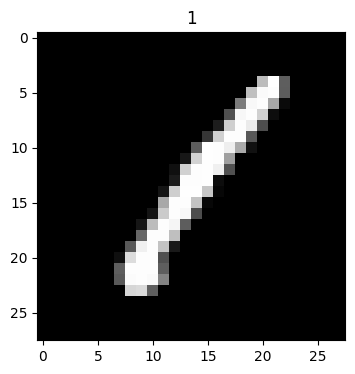

In [33]:
data = pd.read_csv("/content/train_nov24.csv")
etiquetas = data.iloc[:, 0]  #la etiqueta
imagenes = data.iloc[:, 1:].values  #los pixeles

indice_imagen = 0
imagen = imagenes[indice_imagen, :].reshape(28, 28)  #matriz de 28x28

plt.figure(figsize=(4, 4))
plt.imshow(imagen, cmap='gray')  #escala de grises
plt.title(etiquetas.iloc[indice_imagen])
plt.show()


In [10]:
data01 = data[(data.iloc[:, 0] == 0) | (data.iloc[:, 0] == 1)]
data01.to_csv('imagenes_0_1.csv', index=False)

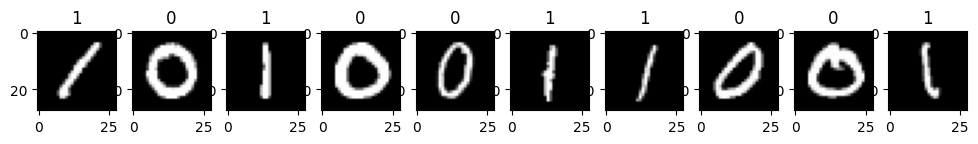

In [34]:
etiquetas = data01.iloc[:, 0]  #etiqeutas
imagenes = data01.iloc[:, 1:].values  #pixeles

#mostrar 10 imagenes
showimg = 10
fig, axes = plt.subplots(1, showimg, figsize=(12, 3))

for i in range(showimg):
    imagen = imagenes[i, :].reshape(28, 28)  #etiqueta y matriz de 28x28
    axes[i].imshow(imagen, cmap='gray')  #escala de grises
    axes[i].set_title(etiquetas.iloc[i])  # Muestra la etiqueta correspondiente a la imagen

plt.show()


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modelos

In [58]:
model = Sequential()

#red neurona de 5 capas
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  #uso sigmoide para clasificacion binaria

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
63/63 [==============================] - 1s 6ms/step - loss: 0.2819 - accuracy: 0.9057 - val_loss: 0.0487 - val_accuracy: 0.9861
Epoch 2/5
63/63 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9970 - val_loss: 0.0293 - val_accuracy: 0.9921
Epoch 3/5
63/63 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9975 - val_loss: 0.0296 - val_accuracy: 0.9921
Epoch 4/5
63/63 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9980 - val_loss: 0.0297 - val_accuracy: 0.9921
Epoch 5/5
63/63 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0300 - val_accuracy: 0.9921


16/16 [==============================] - 0s 2ms/step


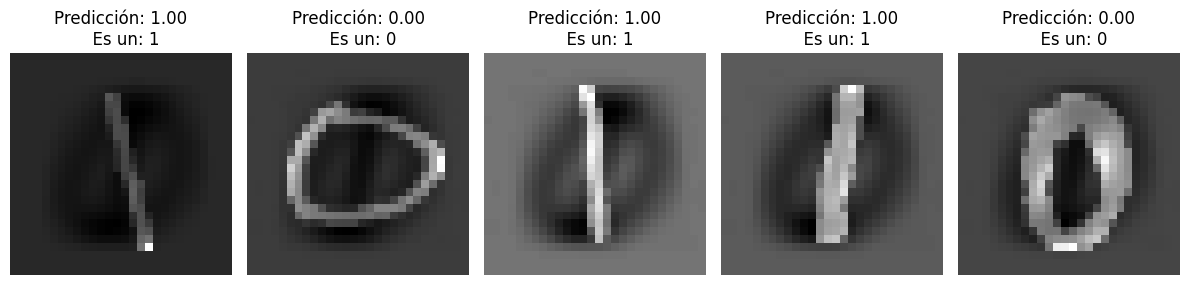

In [59]:
predictions = model.predict(X_test)

# Mostrar algunos ejemplos del conjunto de validación
num_ejemplos = 5
plt.figure(figsize=(12, 4))
for i in range(num_ejemplos):
    plt.subplot(1, num_ejemplos, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Mostrar la imagen
    plt.title(f'Predicción: {predictions[i][0]:.2f}\n  Es un: {y_test.iloc[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Perdida: ",loss)
print("Precision",accuracy)

Perdida:  0.029990961775183678
Precision 0.9920634627342224


Modelo 2, 7 capas

In [72]:
# Creación del modelo de red neuronal
model2 = Sequential()

# Agregando capas a la red neuronal
model2.add(Dense(60, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(40, activation='relu'))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))  # Capa de salida con activación sigmoide para clasificación binaria

# Compilación del modelo
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history2 = model2.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/3
63/63 [==============================] - 3s 7ms/step - loss: 0.1660 - accuracy: 0.9767 - val_loss: 0.0188 - val_accuracy: 0.9940
Epoch 2/3
63/63 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0159 - val_accuracy: 0.9960
Epoch 3/3
63/63 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0108 - val_accuracy: 0.9980


16/16 [==============================] - 0s 2ms/step


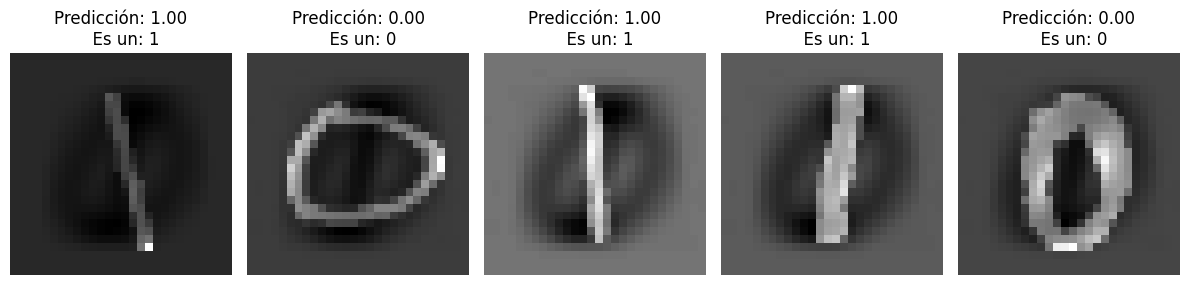

In [73]:
predictions = model2.predict(X_test)

# Mostrar algunos ejemplos del conjunto de validación
num_ejemplos = 5
plt.figure(figsize=(12, 4))
for i in range(num_ejemplos):
    plt.subplot(1, num_ejemplos, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Mostrar la imagen
    plt.title(f'Predicción: {predictions[i][0]:.2f}\n  Es un: {y_test.iloc[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [74]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("Perdida: ",loss)
print("Precision",accuracy)

Perdida:  0.010753598995506763
Precision 0.9980158805847168


Modelo 3: 8 capas

In [84]:
# Creación del modelo de red neuronal
model3 = Sequential()

# Agregando capas a la red neuronal
model3.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(2, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))  # Capa de salida con activación sigmoide para clasificación binaria

# Compilación del modelo
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history3 = model3.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
63/63 [==============================] - 4s 14ms/step - loss: 0.3787 - accuracy: 0.9201 - val_loss: 0.2973 - val_accuracy: 0.9960
Epoch 2/5
63/63 [==============================] - 1s 9ms/step - loss: 0.3064 - accuracy: 0.9995 - val_loss: 0.2818 - val_accuracy: 0.9940
Epoch 3/5
63/63 [==============================] - 1s 9ms/step - loss: 0.2921 - accuracy: 0.9990 - val_loss: 0.2718 - val_accuracy: 0.9921
Epoch 4/5
63/63 [==============================] - 0s 5ms/step - loss: 0.2786 - accuracy: 1.0000 - val_loss: 0.2606 - val_accuracy: 0.9921
Epoch 5/5
63/63 [==============================] - 0s 6ms/step - loss: 0.2661 - accuracy: 1.0000 - val_loss: 0.2491 - val_accuracy: 0.9921


16/16 [==============================] - 0s 2ms/step


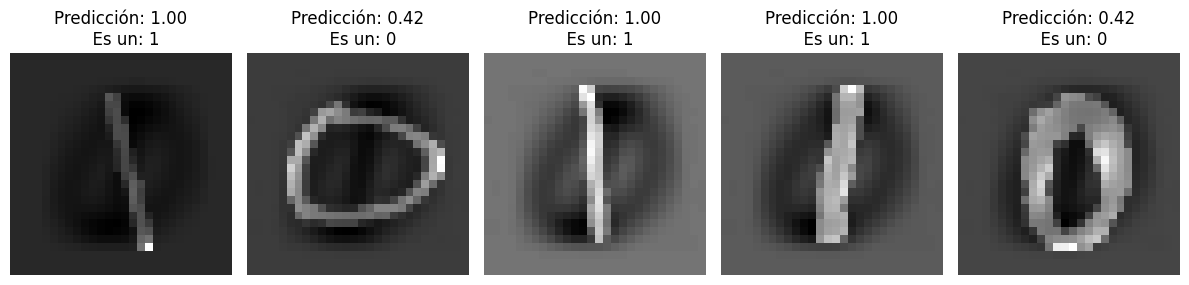

In [85]:
predictions = model3.predict(X_test)

# Mostrar algunos ejemplos del conjunto de validación
num_ejemplos = 5
plt.figure(figsize=(12, 4))
for i in range(num_ejemplos):
    plt.subplot(1, num_ejemplos, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Mostrar la imagen
    plt.title(f'Predicción: {predictions[i][0]:.2f}\n  Es un: {y_test.iloc[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [80]:
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print("Perdida: ",loss)
print("Precision",accuracy)

Perdida:  0.3565899729728699
Precision 0.9940476417541504
